In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import pandas as pd
import numpy as np
# 샘플 데이터 생성 (이상치 포함)
df_data = pd.read_csv("ShoppingMallDeliveryWithDate.csv")
df_data[:10]

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231
5,무통장입금,D-20181231-0000108-01,2019-01-07 오전 8:56,2019-01-11 오전 5:32,75240,1374.0,1,모바일웹,20181231
6,무통장입금,D-20181231-0000184-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,82170,1071.0,1,PC쇼핑몰,20181231
7,무통장입금,D-20181231-0000184-01,2019-01-03 오전 9:30,2019-01-07 오전 5:32,63470,1373.0,1,PC쇼핑몰,20181231
8,무통장입금,D-20181231-0000184-02,2019-01-03 오전 9:30,2019-01-07 오전 5:32,300960,1374.0,4,PC쇼핑몰,20181231
9,무통장입금,D-20181231-0000184-03,2019-01-03 오전 9:30,2019-01-07 오전 5:32,121110,1037.0,1,PC쇼핑몰,20181231


In [3]:
df_data.shape

(46749, 9)

## 배송 지연 확인

In [4]:
delivery_start = df_data['배송시작일'].sort_index()
delivery_start

0         2019-01-07 오전 8:56
1         2019-01-03 오전 9:30
2         2019-01-03 오전 9:30
3         2019-01-03 오전 9:30
4         2019-01-07 오전 8:56
                ...         
46744     2017-12-29 오후 4:32
46745     2018-01-03 오전 9:45
46746     2018-01-02 오후 7:06
46747     2018-01-03 오후 2:00
46748    2018-01-03 오후 12:43
Name: 배송시작일, Length: 46749, dtype: object

In [5]:
delivery_end = df_data['배송완료일'].sort_index()
delivery_end

0        2019-01-11 오전 5:32
1        2019-01-07 오전 5:32
2        2019-01-07 오전 5:32
3        2019-01-07 오전 5:32
4        2019-01-11 오전 5:32
                ...        
46744    2018-01-02 오전 5:31
46745    2018-01-07 오전 5:38
46746    2018-01-11 오전 2:46
46747    2018-01-06 오후 6:06
46748    2018-01-07 오전 5:38
Name: 배송완료일, Length: 46749, dtype: object

In [6]:
# '오전'과 '오후'를 'AM'과 'PM'으로 치환
df_data['배송시작일'] = df_data['배송시작일'].str.replace('오전', 'AM').str.replace('오후', 'PM')
df_data['배송완료일'] = df_data['배송완료일'].str.replace('오전', 'AM').str.replace('오후', 'PM')

In [7]:
# 날짜형으로 변환
df_data['배송시작일'] = pd.to_datetime(df_data['배송시작일'], format='%Y-%m-%d %p %I:%M')
df_data['배송완료일'] = pd.to_datetime(df_data['배송완료일'], format='%Y-%m-%d %p %I:%M')
df_data['배송시작일'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 46749 entries, 0 to 46748
Series name: 배송시작일
Non-Null Count  Dtype         
--------------  -----         
46749 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 365.4 KB


In [8]:
df_data['배송완료일'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 46749 entries, 0 to 46748
Series name: 배송완료일
Non-Null Count  Dtype         
--------------  -----         
46749 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 365.4 KB


In [9]:
# 배송시간 계산
df_data['배송시간'] = (df_data['배송완료일'] - df_data['배송시작일']).dt.days
df_data['배송시간']

0        3
1        3
2        3
3        3
4        3
        ..
46744    3
46745    3
46746    8
46747    3
46748    3
Name: 배송시간, Length: 46749, dtype: int64

In [10]:
# 배송시간을 범주형으로 변환
bins = [0, 2, 4, 6, 8, 10, np.inf]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']
df_data['배송시간_확인'] = pd.cut(df_data['배송시간'], bins=bins, labels=labels)
df_data['배송시간_확인']

0        2-4
1        2-4
2        2-4
3        2-4
4        2-4
        ... 
46744    2-4
46745    2-4
46746    6-8
46747    2-4
46748    2-4
Name: 배송시간_확인, Length: 46749, dtype: category
Categories (6, object): ['0-2' < '2-4' < '4-6' < '6-8' < '8-10' < '10+']

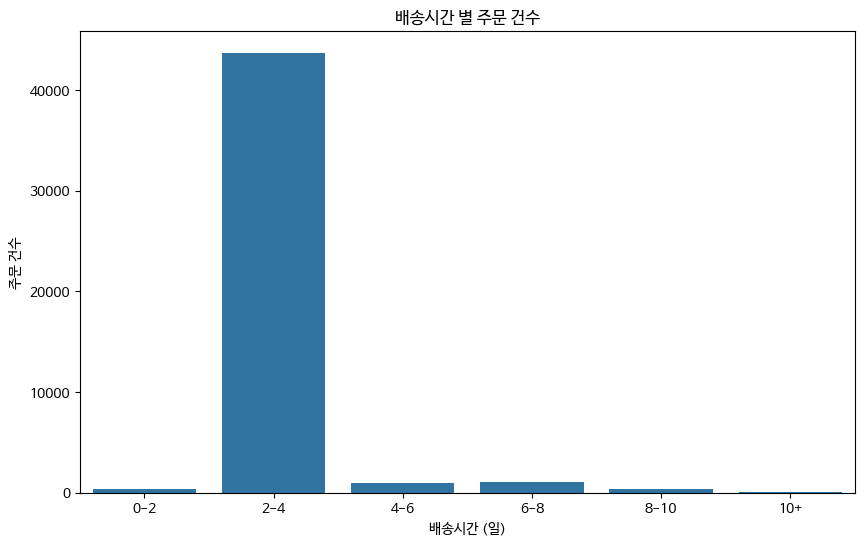

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='배송시간_확인', data=df_data, order=labels)
plt.title('배송시간 별 주문 건수')
plt.xlabel('배송시간 (일)')
plt.ylabel('주문 건수')
plt.show()